In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
cols = ['experiment_name',
        'test_acc',
        'train_time',
        'entropy__auc',
        'entropy_expectation__auc',
        'classifier__auc']

In [4]:
experiments = ['mlp', 'mlp-dropout', 'mlp-bayesian', 'mlp-poor-bayesian']

In [5]:
dfs = []
for exp in experiments:
    df_with = pd.read_csv(exp+'_with_unknown.csv')
    df_with_results = df_with[cols].set_index('experiment_name')
    df_without = pd.read_csv(exp+'_out_unknown.csv')
    df_without_results = df_without[cols].set_index('experiment_name')
    dfs.append([exp, df_with_results, df_without_results])

In [6]:
results_cols = ['experiment',
                'in_test_acc', 'out_test_acc',
                'in_train_time', 'out_train_time',
                'in_entropy_auc', 'out_entropy_auc',
                'in_entropy_expectation_auc', 'out_entropy_expectation_auc',
                'in_classifier_auc', 'out_classifier_auc']

dfs_results = []
for exp, df_with, df_without in dfs:
    results = pd.DataFrame(columns=results_cols)
    for (in_key, *in_row), (out_key, *out_row) in zip(df_with.itertuples(), df_without.itertuples()):
        assert in_key == out_key
        results.loc[len(results)] = [
            str(in_key),
            in_row[0], out_row[0],
            in_row[1], out_row[1],
            in_row[2], out_row[2],
            in_row[3], out_row[3],
            in_row[4], out_row[4],
        ]
    dfs_results.append([exp, results])

In [7]:
final_results_cols = ['experiment']
for c in results_cols[1:]:
    for exp, _ in dfs_results:
        final_results_cols.append(exp+'_'+c)

In [8]:
final_results = pd.DataFrame(columns=final_results_cols)
for key_row in zip(*[df.itertuples() for exp, df in dfs_results]):
    for i in range(1, len(key_row)):
        _, *prev_row = key_row[i-1]
        _, *row = key_row[i]
        assert prev_row[0] == row[0]
        
    _, *row = key_row[0]
    new_row = [row[0]]
    
    for c in range(1, len(results_cols)):
        for _, *row in key_row:
            new_row.append(row[c])

    final_results.loc[len(final_results)] = new_row

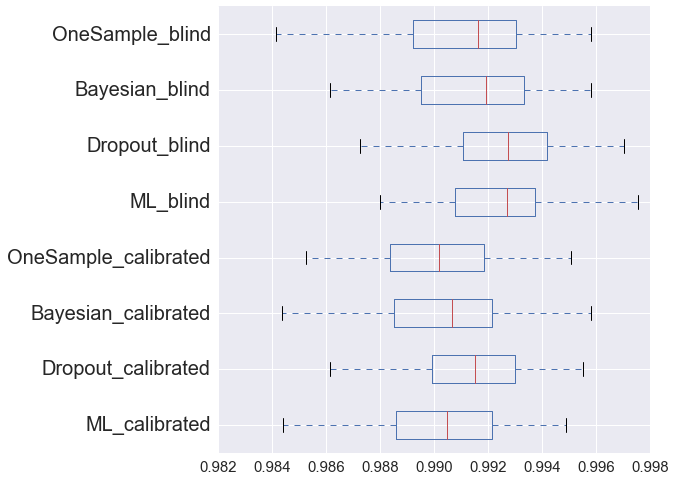

In [14]:
plt.figure()
df = final_results[[c for c in final_results.columns if 'test_acc' in c]].copy()

r1 = {o: 'ML_blind' for o in df.columns if 'mlp_' in o and '_out_' in o}
r2 = {o: 'ML_calibrated' for o in df.columns if 'mlp_' in o and '_in_' in o}
r3 = {o: 'Dropout_blind' for o in df.columns if 'mlp-dropout_' in o and '_out_' in o}
r4 = {o: 'Dropout_calibrated' for o in df.columns if 'mlp-dropout_' in o and '_in_' in o}
r5 = {o: 'OneSample_blind' for o in df.columns if 'mlp-poor-bayesian_' in o and '_out_' in o}
r6 = {o: 'OneSample_calibrated' for o in df.columns if 'mlp-poor-bayesian_' in o and '_in_' in o}
r7 = {o: 'Bayesian_blind' for o in df.columns if 'mlp-bayesian_' in o and '_out_' in o}
r8 = {o: 'Bayesian_calibrated' for o in df.columns if 'mlp-bayesian_' in o and '_in_' in o}

df.rename(columns=r1, inplace=True)
df.rename(columns=r2, inplace=True)
df.rename(columns=r3, inplace=True)
df.rename(columns=r4, inplace=True)
df.rename(columns=r5, inplace=True)
df.rename(columns=r6, inplace=True)
df.rename(columns=r7, inplace=True)
df.rename(columns=r8, inplace=True)
mpl.rcParams['figure.figsize'] = 10, 5
mpl.rcParams['xtick.labelsize'] = 15
df.boxplot(fontsize=20, vert=False)
plt.subplots_adjust(left=0.3)

In [ ]:
plt.figure()
idxs = [c for c in final_results.columns if 'time' in c]
final_results.boxplot(return_type='axes', vert=False, column=idxs)
plt.subplots_adjust(left=0.4)

In [ ]:
plt.figure()
idxs = [c for c in final_results.columns if 'entropy' in c and 'expect' not in c]
final_results.boxplot(return_type='axes', vert=False, column=idxs)
plt.subplots_adjust(left=0.4)

In [ ]:
plt.figure()
idxs = [c for c in final_results.columns if 'expect' in c]
final_results.boxplot(return_type='axes', vert=False, column=idxs)
plt.subplots_adjust(left=0.4)

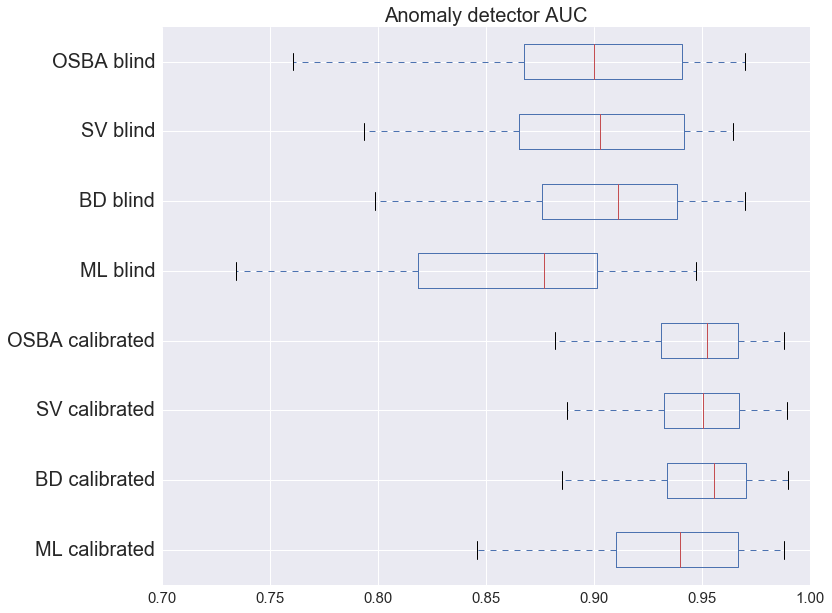

In [22]:
plt.figure()
# mpl.rcParams['ytick.labelsize'] = 13
# mpl.rcParams['font.size'] = 15

df = final_results[[c for c in final_results.columns if 'classifier' in c]].copy()

r1 = {o: 'ML blind' for o in df.columns if 'mlp_' in o and '_out_' in o}
r2 = {o: 'ML calibrated' for o in df.columns if 'mlp_' in o and '_in_' in o}
r3 = {o: 'BD blind' for o in df.columns if 'mlp-dropout_' in o and '_out_' in o}
r4 = {o: 'BD calibrated' for o in df.columns if 'mlp-dropout_' in o and '_in_' in o}
r5 = {o: 'OSBA blind' for o in df.columns if 'mlp-poor-bayesian_' in o and '_out_' in o}
r6 = {o: 'OSBA calibrated' for o in df.columns if 'mlp-poor-bayesian_' in o and '_in_' in o}
r7 = {o: 'SV blind' for o in df.columns if 'mlp-bayesian_' in o and '_out_' in o}
r8 = {o: 'SV calibrated' for o in df.columns if 'mlp-bayesian_' in o and '_in_' in o}

df.rename(columns=r1, inplace=True)
df.rename(columns=r2, inplace=True)
df.rename(columns=r3, inplace=True)
df.rename(columns=r4, inplace=True)
df.rename(columns=r5, inplace=True)
df.rename(columns=r6, inplace=True)
df.rename(columns=r7, inplace=True)
df.rename(columns=r8, inplace=True)
mpl.rcParams['figure.figsize'] = 10, 8
mpl.rcParams['xtick.labelsize'] = 15
ax = df.boxplot(fontsize=20, vert=False)
plt.subplots_adjust(left=0.3)
plt.title('Anomaly detector AUC', fontsize=20)

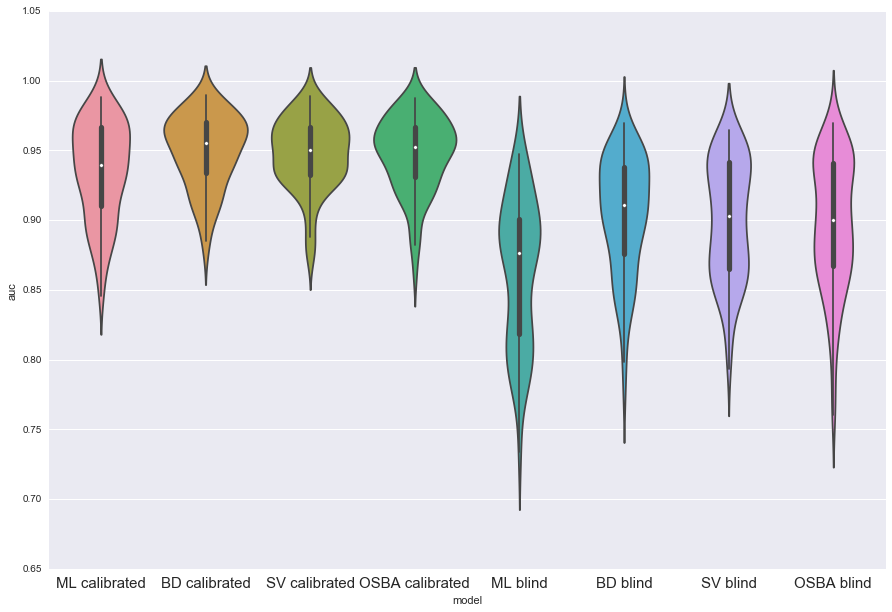

In [31]:
cols = []
values = []
for c in df.columns:
    vls = df[c].values
    values.append(vls)
    cols.append([c]*len(vls))
cols = np.concatenate(cols)
values = np.concatenate(values)
sns.violinplot(x="model", y="auc", data=pd.DataFrame({'model': cols, 'auc': values}))
mpl.rcParams['figure.figsize'] = 15, 10
sns.despine(left=True)